Importanto bibliotecas necessárias

In [300]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Introdução


**Contextualização**

- ***Taxa de desemprego:*** Percentual da população de 16 anos e mais, economicamente ativa, desocupada.
- ***Porcentagem de pobres:*** O salário mínimo do último ano para o qual a série está sendo calculada torna-se a referência para toda a série. Esse valor é corrigido para todos com base no INPC de julho de 2010, alterando o valor da linha de pobreza e consequentemente a proporção de pobres. Nesta tabela, o valor de referência, salário mínimo de 2010, é de R$ 510,00.
- ***Taxa de incidencia de Tuberlose:***
Taxa de incidência: casos por 100.000 habitantes
Informações apresentadas segundo local de residência e ano do diagnóstico; considerados os casos com tipo de entrada igual a "caso novo" ou "não sabe".
Situação da base de dados em novembro/2013. Dados de 2001 a 2010 atualizados em realização ao IDB anterior.
Nas tabulações por faixa etária ou sexo, estão suprimidos os casos com faixa etária ou sexo ignorados, respectivamente.
- ***Indice Gini:***


**Tema e Objetivo**


**Base de Dados**


# Manipulando as planilhas de dados

In [320]:
desemprego0 = pd.read_excel('planilhas capitais/%_desemprego.xlsx')
pobres_brancos_negros0 = pd.read_excel('planilhas capitais/%_pobres_brancos_negros.xlsx')
indice_gini0 = pd.read_excel('planilhas capitais/Indice_Gini_2010.xlsx')
aids0 = pd.read_excel('planilhas capitais/Taxa_de_inc_AIDS_2010.xlsx')
analfabetismo0 = pd.read_excel('planilhas capitais/%_anafabetismo.xlsx')
turbeculose0 = pd.read_excel('planilhas capitais/Numero_de_Casos_Tuberculose.xlsx')

- **Limpando Dados:**

In [303]:

df_desemprego = desemprego0.drop(desemprego0.index[-6:])

df_pobres0 = pobres_brancos_negros0.drop(pobres_brancos_negros0.index[-9:])

df_indice_gini0= indice_gini0.drop(indice_gini0.index[-2:])

df_aids0 = aids0.drop(aids0.index[-14:])

df_analfabetismo0 = analfabetismo0.drop(analfabetismo0.index[-10:])


In [304]:
del df_indice_gini0[1991]
del df_indice_gini0[2000]

In [306]:
df_pobres = df_pobres0.rename(columns={'Parda': 'Pop. Pobre Parda', 'Total': 'Pop. Pobre Total','Branca': 'Pop. Pobre Branca','Preta': 'Pop. Pobre Preta'})
df_aids = df_aids0.rename(columns={'Taxa_de_incidência': 'Tx. AIDS'})
df_analfabetismo = df_analfabetismo0.rename(columns={'Taxa_de_analfabetismo_(15a_e+)': 'Tx. Analfabetismo'})
df_desemprego = df_desemprego.rename(columns={'Tx_desemprego_16_anos_e_+_(%)': 'Tx. Desemprego'})
df_gini = df_indice_gini0.rename(columns={2010: 'Indice Gini'})

In [307]:
result_1 = pd.merge(df_gini, df_pobres, how='inner', on='Capital')
result_2 = pd.merge(result_1, df_desemprego, how='inner', on='Capital')
result_3 = pd.merge(result_2, df_aids, how='inner', on='Capital')
result_4 = pd.merge(result_3, df_analfabetismo, how='inner', on='Capital')

##### **Bases de dados**

In [308]:
df = result_4

In [309]:
df2 = df.copy()

In [310]:
df2

,Capital,Indice Gini,Pop. Pobre Branca,Pop. Pobre Preta,Pop. Pobre Parda,Pop. Pobre Total,Tx. Desemprego,Tx. AIDS,Tx. Analfabetismo
0,Porto Velho,0.5745,18.51,23.01,28.44,25.30,5.63,42.94,5.21
1,Rio Branco,0.6121,29.71,42.11,41.31,38.50,8.69,11.01,8.86
2,Manaus,0.6334,29.70,38.79,40.85,37.78,10.79,49.78,3.91
3,Boa Vista,0.5936,25.42,39.22,37.07,34.81,7.33,46.08,5.66
4,Belém,0.6284,27.44,37.33,39.77,36.23,10.07,41.84,3.31
5,Macapá,0.6037,31.94,39.21,43.35,39.87,11.35,19.59,6.03
6,Palmas,0.5914,16.79,31.04,26.12,23.52,6.34,16.64,3.74
7,São Luís,0.6266,28.42,39.57,42.69,37.94,11.92,39.12,4.58
8,Teresina,0.6171,29.09,45.32,42.48,39.18,9.55,27.27,8.78
9,Fortaleza,0.6267,26.17,43.42,40.42,35.26,7.53,24.83,6.82


In [311]:
df2.columns

Index(['Capital', 'Indice Gini', 'Pop. Pobre Branca', 'Pop. Pobre Preta',
       'Pop. Pobre Parda', 'Pop. Pobre Total', 'Tx. Desemprego', 'Tx. AIDS',
       'Tx. Analfabetismo'],
      dtype='object')

In [312]:

quantitativas = ['Indice Gini', 'Pop. Pobre Branca', 'Pop. Pobre Preta' 'Pop. Pobre Parda', 'Pop. Pobre Total', 'Tx. Desemprego', 'Tx. AIDS',
       'Tx. Analfabetismo']
                    

In [313]:
#função relativiza per capta
def relativiza(planilha):
    
    
    quantitativas = ['Indice Gini', 'Pop. Pobre Branca', 'Pop. Pobre Preta', 'Pop. Pobre Parda', 'Pop. Pobre Total', 'Tx. Desemprego', 'Tx. AIDS',
       'Tx. Analfabetismo']
    
    for variavel in quantitativas:
        planilha[variavel] = planilha[variavel].astype(float)
        


    return planilha



var_quantitativas = relativiza(df2)

<AxesSubplot:>

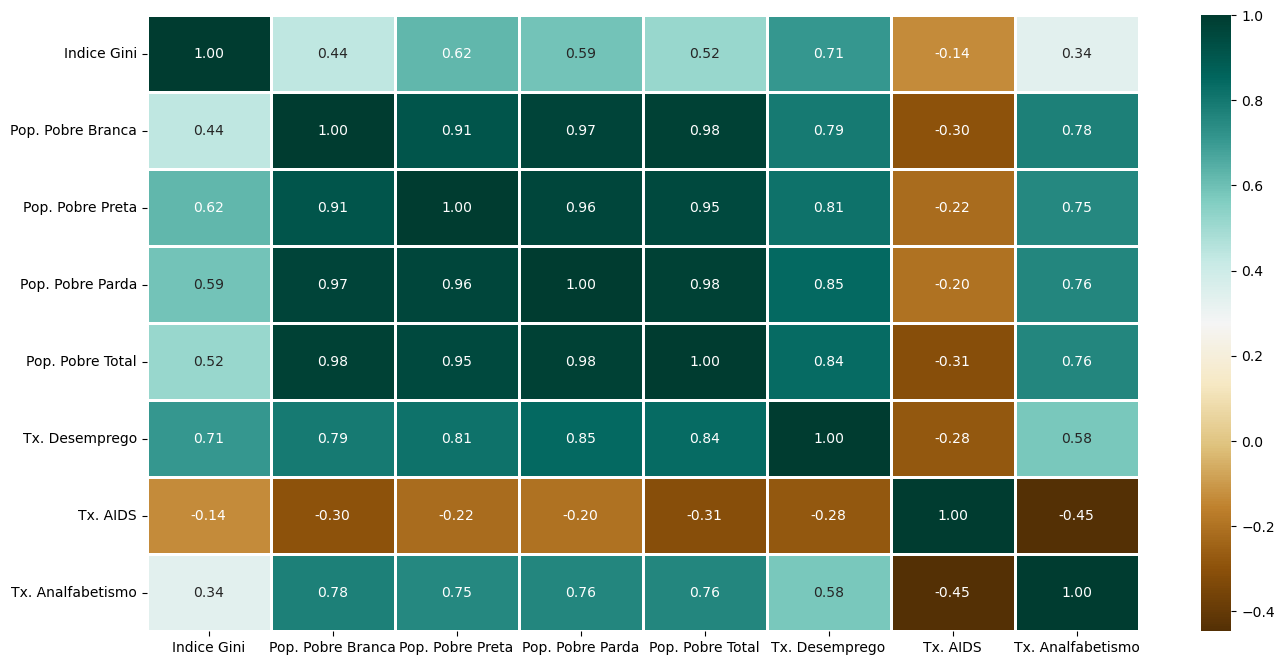

In [316]:
plt.figure(figsize=(16, 8))
sns.heatmap(var_quantitativas.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 2,
            annot = True)

### Dicionário:

- **Jogado em terreno baldio ou logradouro:** Número de moradores por lixo jogado em terreno baldio ou logradouro
- **Jogado em rio, lago ou mar:** Número de moradores por lixo jogado em rio, lago ou mar
- **Cobertura Vacinal** Porcentagem de Vacinas com Cobertura Adequada por município



**Estrutura do Projeto**

Serão exploradas técnicas de regressão para a previsão da variável quantitativa "Quantidade de Desistência no Curso". A qualidade da comunicação e apresentação dos resultados também será uma prioridade, assegurando que os resultados sejam compreensíveis para um público amplo.

Este projeto tem como objetivo fornecer previsões robustas e ir além de uma simples análise exploratória de dados. Espera-se que a análise e modelos desenvolvidos ajudem a entender e prever as desistências em cursos de graduação, o que pode ter implicações importantes na melhoria da Educação Superior.

### Merge dos Dados

# Pergunta

Com base no arquivo de 2008, a gente vê se aqueles fatores ainda estão influenciando em 2010


### Data Processing

# Minerando Dados e Características do Dataset

# Modelos de Predição

# Processo e Estatísticas de Validação

# Conclusão 

# Referências Bibliográficas